In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
piracy_df_original = pd.read_csv('Data_Files\[Clean] IMO Piracy - 2000 to 2022 (PDV 01-2023).csv')
# pd.concat([piracy_df_original.head(), piracy_df_original.tail()])
piracy_df_original.head(1)

Incident Date Ship Name Ship Flag Ship Type                     Area  \
0     3/18/2010  AL-ASA'A     Yemen      Dhow  In international waters   

   Latitude  Longitude Consequences to Crew Part of Ship Raided Ship Status  \
0       NaN        NaN        Ship Hijacked          Not Stated  Not Stated   

           Weapons Used  Flag - Crew Injuries  Flag - Crew Held Hostage  \
0  None or Not Reported                 False                      True   

   Flag - Crew Missing  Flag - Crew Deaths  Flag - Crew Assaulted  
0                False               False                  False

In [29]:
#piracy_df_original['Part of Ship Raided'].value_counts()

In [30]:
#piracy_df_original['Consequences to Crew'].value_counts()

In [31]:
#piracy_df_original['Flag - Crew Injuries'].value_counts()

In [32]:
#piracy_df_original['Flag - Crew Held Hostage'].value_counts()

In [33]:
#piracy_df_original['Flag - Crew Missing'].value_counts()

In [34]:
#piracy_df_original['Flag - Crew Deaths'].value_counts()

In [35]:
#piracy_df_original['Flag - Crew Assaulted'].value_counts()

In [10]:
piracy_df_original['Ship Type'].unique()

array(['Dhow', 'Fishing vessel', 'Tanker', 'Supply ship',
       'General cargo ship', 'Tug', 'Container ship', 'Yacht',
       'Bulk carrier', 'Chemical tanker', 'General dry cargo ship',
       'Not Reported', 'Vehicle carrier', 'Ro-ro-cargo ship',
       'Oil product tanker', 'Product tanker',
       'Mobile offshore drilling unit', 'Barge carrier', 'LPG tanker',
       'Oil tanker', 'Rescue/standby ship', 'Refrigerated cargo carrier',
       'Livestock carrier', 'Passenger ship', 'Special purpose ship',
       'Ro-Ro-cargo ship', 'Gas carrier-LPG', 'Reefer', 'Landing craft',
       'Cable-Layer', 'Ore/bulk/oil carrier', 'Barge', 'Fishing trawler',
       'Heavy load carrier', 'Gas carrier - LNG', 'Chemical Tanker',
       'Ore/bulk/oil Carrier', 'Research ship', 'Multi purpose ship',
       'Cutter/dredger', 'Container', 'Refrigerated ship',
       'Fishing vessels', 'Product Tanker', 'Boat', 'Unknown',
       'Barter Trade Boat', 'LPG', 'Oil Tanker', 'Ferry',
       'Cement carrie

In [11]:
piracy_df_map = piracy_df_original.dropna(subset=['Latitude','Longitude']) #drop lat/long nulls for a map

In [12]:
severe_df = piracy_df_map[(piracy_df_map['Flag - Crew Deaths'] == True) | (piracy_df_map['Flag - Crew Missing'] == True)]

In [13]:
medium_df = piracy_df_map[(piracy_df_map['Flag - Crew Assaulted'] == True) | (piracy_df_map['Flag - Crew Injuries'] == True) | (piracy_df_map['Flag - Crew Held Hostage'] == True)]


In [14]:
low_df = piracy_df_map[(piracy_df_map['Flag - Crew Assaulted'] == False) & (piracy_df_map['Flag - Crew Injuries'] == False) & (piracy_df_map['Flag - Crew Held Hostage'] == False) & (piracy_df_map['Flag - Crew Deaths'] == False) & (piracy_df_map['Flag - Crew Missing'] == False)]

In [78]:
import folium
from streamlit_folium import st_folium
import streamlit as st

# Create a map using Folium
map_center = [piracy_df_original['Latitude'].mean(), piracy_df_original['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=4)

# Add markers for vessel type, ship status, and country
for index, row in severe_df.iterrows():
    popup_text = f"Vessel Type: {row['Ship Type']}<br>Ship Status: {row['Ship Status']}<br>Ship Origin: {row['Ship Flag']}<br>Latitude:{row['Latitude']}<br>Longitude: {row['Longitude']}"
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='black', fill=True, fill_color='black', popup=popup_text).add_to(m)

for index, row in medium_df.iterrows():
    popup_text = f"Vessel Type: {row['Ship Type']}<br>Ship Status: {row['Ship Status']}<br>Ship Origin: {row['Ship Flag']}<br>Latitude:{row['Latitude']}<br>Longitude: {row['Longitude']}"
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='red', fill=True, fill_color='red', popup=popup_text).add_to(m)

for index, row in low_df.iterrows():
    popup_text = f"Vessel Type: {row['Ship Type']}<br>Ship Status: {row['Ship Status']}<br>Ship Origin: {row['Ship Flag']}<br>Latitude:{row['Latitude']}<br>Longitude: {row['Longitude']}"
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='yellow', fill=True, fill_color='yellow', popup=popup_text).add_to(m)

#example box need to figure out exact area to investigate

top_left1 = [7, -1] #west neg 
bottom_right1 = [-2,10] #south eng 
Gulf_Guinea = folium.Rectangle(bounds=[top_left1, bottom_right1], color='black', fill=False)
Gulf_Guinea.add_to(m)

top_left2 = [20, 40] #west neg 
bottom_right2 = [10, 55.17] #south neg 
Gulf_Aden = folium.Rectangle(bounds=[top_left2, bottom_right2], color='black', fill=False)
Gulf_Aden.add_to(m)

top_left3 = [10, 93] #west neg 
bottom_right3 = [-10, 110] #south neg 
Strait_Malacca = folium.Rectangle(bounds=[top_left3, bottom_right3], color='black', fill=False)
Strait_Malacca.add_to(m)

#legend
legend_html = '''
     <div style="position: fixed; bottom: 50px; left: 50px; width: 200px; height: 120px; background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
     <p><strong>Legend</strong></p>
     <p><i class="fa fa-circle fa-1x" style="color:black"></i> Severe</p>
     <p><i class="fa fa-circle fa-1x" style="color:red"></i> Medium</p>
     <p><i class="fa fa-circle fa-1x" style="color:yellow"></i> Low</p>
     </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m.save('piracy_map.html')



In [79]:
m

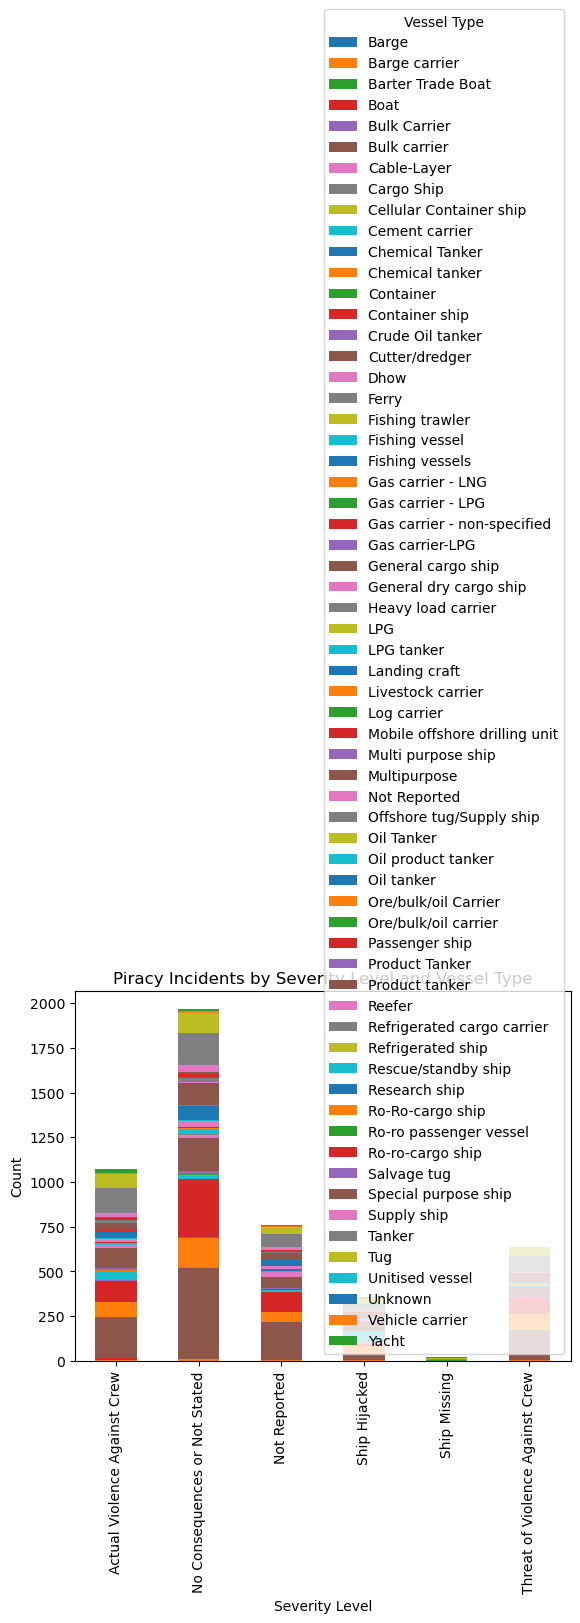

In [92]:
#big picture 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming piracy_original_df is your DataFrame containing the piracy incidents data
# Group the data by severity level and vessel type, and count the occurrences
severity_vessel_counts = piracy_df_original.groupby(['Consequences to Crew', 'Ship Type']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Vessel Type')
plt.legend(title='Vessel Type')
#plt.show()

In [25]:
vessel_type_mapping = {
    'Cargo ships': ['General cargo ship', 'Container ship', 'Container', 'General dry cargo ship', 'Bulk carrier', 'Bulk Carrier', 
                    'Vehicle carrier', 'Ro-ro-cargo ship','Ro-Ro-cargo', 'Refrigerated cargo carrier', 
                    'Livestock carrier', 'Reefer', 'Cable-Layer', 'Ore/bulk/oil carrier', 
                    'Ore/bulk/oil Carrier',  'Cellular Container ship',
                    'Cargo Ship', 'Log carrier', 'Unitised vessel','Cement carrier','Heavy load carrier','Barge carrier'],
    
    'Fishing': ['Fishing vessel', 'Fishing trawler', 'Fishing vessels'],

    'Non commercial ships': ['Research ship','Rescue/standby ship'],

    'Passenger ships': ['Dhow','Ro-ro passenger vessel', 'Ferry', 'Passenger ship', 'Yacht'],

    'Service ships': ['Salvage tug','Tug', 'Supply ship', 'Offshore tug/Supply ship'],

    'Tankers': ['Tanker', 'Chemical tanker', 'Chemical Tanker', 'Oil product tanker', 'Product tanker', 'Product Tanker', 
                'LPG tanker', 'Oil tanker', 'Oil Tanker','Gas carrier-LPG', 'Gas carrier - LPG', 'LPG', 'Gas carrier - LNG','Gas carrier - non-specified',
                'Crude Oil tanker'],

    'All others': ['Cutter/dredger', 'Barge', 'Barge Mobile offshore drilling unit', 'Refrigerated ship', 'Boat', 'Barter Trade Boat', 
                    'Multi purpose ship','Multipurpose','Special purpose ship', 'Landing craft'],

    'Unknown': ['Not Reported', 'Unknown']}

In [58]:
# Function to map vessel types to categories
def map_vessel_type(vessel_type):
    for category, types in vessel_type_mapping.items():
        if vessel_type in types:
            return category



In [57]:
piracy_df_original['Vessel Category'] = piracy_df_original['Ship Type'].map(map_vessel_type) #map the categories to the new types 


In [80]:
# Define the range of latitude and longitude values
#strait of malacca 
min_lat = -10
max_lat = 10
min_lon = 93
max_lon = 150.0

# Filter the DataFrame based on the range of latitude and longitude values make sure to use piracy_df_map bc null values will mess up the dataframe
strait_malacca_df = piracy_df_map[(piracy_df_map['Latitude'] >= min_lat) & (piracy_df_map['Latitude'] <= max_lat) &
                                  (piracy_df_map['Longitude'] >= min_lon) & (piracy_df_map['Longitude'] <= max_lon)]

# Display the filtered DataFrame

In [82]:
strait_malacca_df.loc[:,'Vessel Category'] = strait_malacca_df['Ship Type'].map(map_vessel_type)


C:\Users\julia\AppData\Local\Temp\ipykernel_33392\1065735473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strait_malacca_df.loc[:,'Vessel Category'] = strait_malacca_df['Ship Type'].map(map_vessel_type)


In [87]:
#Gulf Eden  

min_lat = 10
max_lat = 20
min_lon = 93
max_lon = 110.0

# Filter the DataFrame based on the range of latitude and longitude values make sure to use piracy_df_map bc null values will mess up the dataframe
gulf_of_eden_df = piracy_df_map[(piracy_df_map['Latitude'] >= min_lat) & (piracy_df_map['Latitude'] <= max_lat) &
                                  (piracy_df_map['Longitude'] >= min_lon) & (piracy_df_map['Longitude'] <= max_lon)]

# Display the filtered DataFrame

In [89]:
gulf_of_eden_df.loc[:,'Vessel Category'] = gulf_of_eden_df['Ship Type'].map(map_vessel_type)


C:\Users\julia\AppData\Local\Temp\ipykernel_33392\2265968537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gulf_of_eden_df.loc[:,'Vessel Category'] = gulf_of_eden_df['Ship Type'].map(map_vessel_type)


In [90]:
#Gulf of Guinea
min_lat = -2
max_lat = 7
min_lon = -1
max_lon = 10

# Filter the DataFrame based on the range of latitude and longitude values make sure to use piracy_df_map bc null values will mess up the dataframe
gulf_of_guinea_df = piracy_df_map[(piracy_df_map['Latitude'] >= min_lat) & (piracy_df_map['Latitude'] <= max_lat) &
                                  (piracy_df_map['Longitude'] >= min_lon) & (piracy_df_map['Longitude'] <= max_lon)]

# Display the filtered DataFrame

In [91]:
gulf_of_guinea_df.loc[:,'Vessel Category'] = gulf_of_guinea_df['Ship Type'].map(map_vessel_type)


C:\Users\julia\AppData\Local\Temp\ipykernel_33392\3150627769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gulf_of_guinea_df.loc[:,'Vessel Category'] = gulf_of_eden_df['Ship Type'].map(map_vessel_type)


### All DataFrames created:

In [ ]:
###The specific dataframes for our box areas.
piracy_df_original #original dataframe that includes all events regardless of whether lat/longs are available
piracy_df_map #contains only data that includes lat/long in order to plot on map
strait_malacca_df
gulf_of_eden_df
gulf_of_guinea_df

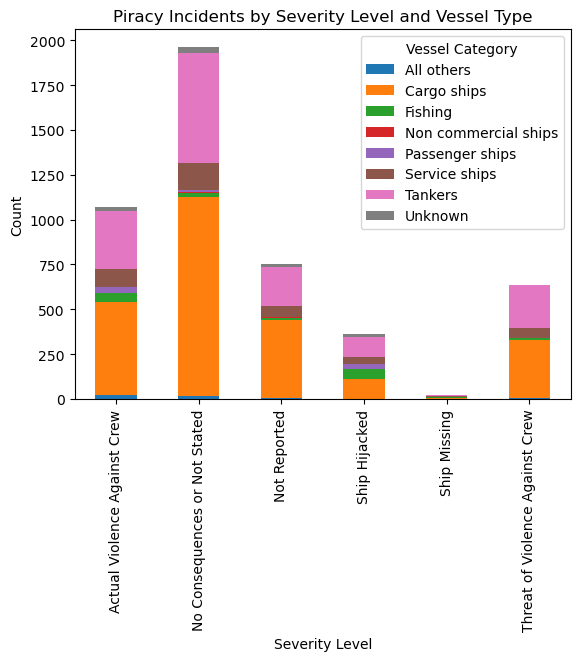

In [28]:
#Bid picture across the globe. 

severity_vessel_counts = piracy_df_original.groupby(['Consequences to Crew', 'Vessel Category']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Vessel Type')
plt.legend(title='Vessel Category')
plt.show()

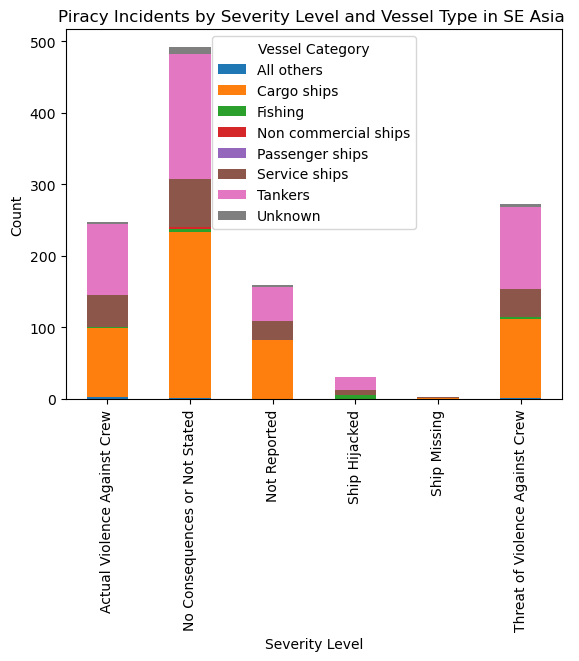

In [83]:

severity_vessel_counts = strait_malacca_df.groupby(['Consequences to Crew', 'Vessel Category']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Vessel Type in the Strait of Malacca ')
plt.legend(title='Vessel Category')
plt.show()

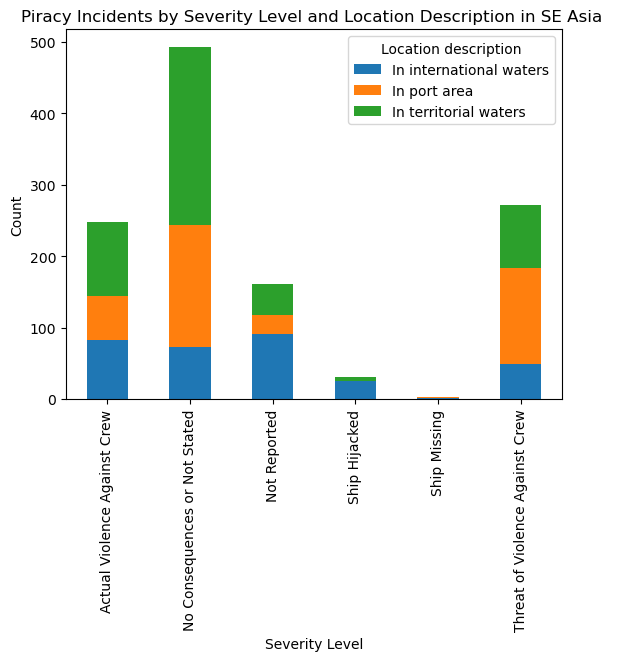

In [84]:
severity_vessel_counts = strait_malacca_df.groupby(['Consequences to Crew', 'Area']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Location Description in SE Asia ')
plt.legend(title='Location description')
plt.show()

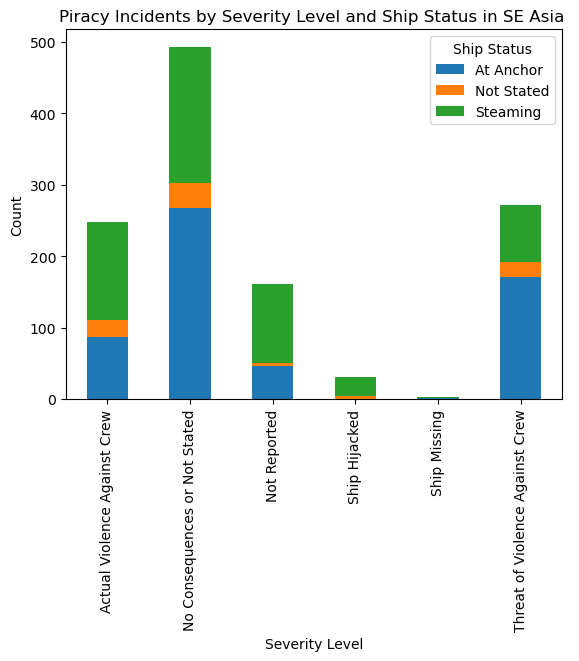

In [85]:
severity_vessel_counts = strait_malacca_df.groupby(['Consequences to Crew', 'Ship Status']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Ship Status in SE Asia ')
plt.legend(title='Ship Status')
plt.show()

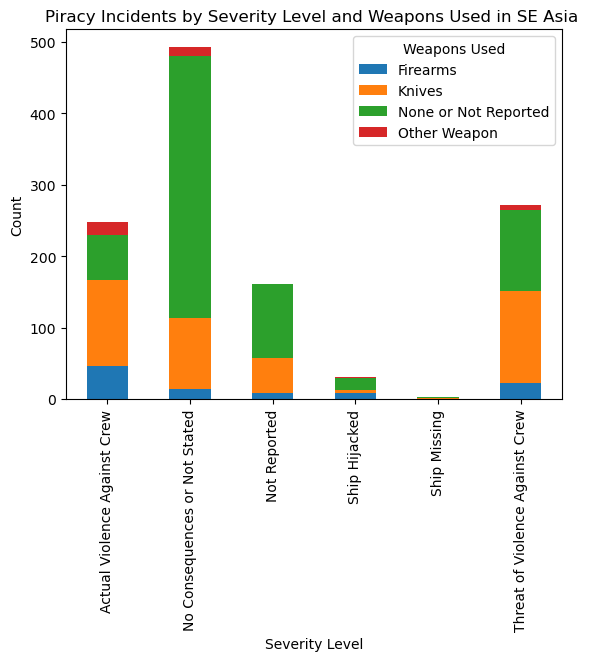

In [86]:
severity_vessel_counts = strait_malacca_df.groupby(['Consequences to Crew', 'Weapons Used']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Weapons Used in SE Asia ')
plt.legend(title='Weapons Used')
plt.show()